In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

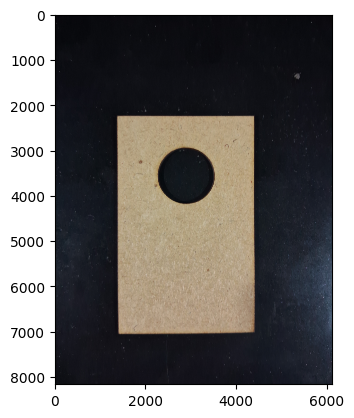

In [5]:
img_p = r'C:\Users\Siddhartha Devan V\Downloads\20240502_181707.jpg'
img = cv2.imread(img_p)
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)

In [8]:
def contour_drawer(img,num, show_img = True, binary_thresh =(30,60), color = (0, 255, 0)):
    rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.GaussianBlur(gray_image, (5, 5), 1)
    _, binary_image = cv2.threshold(gray_image, binary_thresh[0], binary_thresh[1], cv2.THRESH_BINARY)
    img_copy = rgb_image.copy()
    contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    if show_img == True:	
        img_copy2 = rgb_image.copy()
        img_copy2 = cv2.drawContours(img_copy2, contours[num], -1, color, 10)
        plt.imshow(img_copy2)

    return contours, len(contours)
    # img_copy = cv2.drawContours(img_copy, contours, -1, (0, 255, 0), 10)
    
    # plt.imshow(img_copy)

In [100]:
y,x,rgb =img.shape

In [101]:
print(x,y)

6120 8160


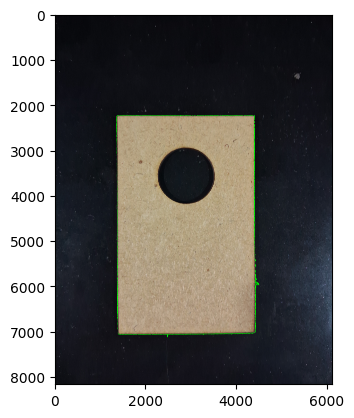

In [9]:
contours, length = contour_drawer(img,0)

In [10]:
rect = np.array(contours[0])

In [11]:
print(rect.shape)

(9448, 1, 2)


In [86]:
print(rect[:100])

[[[ 898 1445]]

 [[ 897 1446]]

 [[ 896 1446]]

 [[ 895 1446]]

 [[ 894 1446]]

 [[ 893 1446]]

 [[ 892 1446]]

 [[ 891 1446]]

 [[ 890 1446]]

 [[ 889 1447]]

 [[ 888 1447]]

 [[ 887 1447]]

 [[ 886 1447]]

 [[ 885 1447]]

 [[ 884 1447]]

 [[ 883 1448]]

 [[ 882 1448]]

 [[ 881 1447]]

 [[ 880 1447]]

 [[ 879 1447]]

 [[ 878 1447]]

 [[ 877 1447]]

 [[ 876 1447]]

 [[ 875 1447]]

 [[ 874 1447]]

 [[ 873 1447]]

 [[ 872 1448]]

 [[ 871 1448]]

 [[ 870 1448]]

 [[ 869 1448]]

 [[ 868 1448]]

 [[ 867 1448]]

 [[ 866 1448]]

 [[ 865 1448]]

 [[ 864 1448]]

 [[ 863 1448]]

 [[ 862 1448]]

 [[ 861 1448]]

 [[ 860 1449]]

 [[ 859 1449]]

 [[ 859 1450]]

 [[ 859 1451]]

 [[ 860 1451]]

 [[ 861 1452]]

 [[ 861 1453]]

 [[ 861 1454]]

 [[ 860 1455]]

 [[ 860 1456]]

 [[ 860 1457]]

 [[ 860 1458]]

 [[ 860 1459]]

 [[ 860 1460]]

 [[ 860 1461]]

 [[ 860 1462]]

 [[ 860 1463]]

 [[ 860 1464]]

 [[ 859 1465]]

 [[ 859 1466]]

 [[ 859 1467]]

 [[ 859 1468]]

 [[ 859 1469]]

 [[ 859 1470]]

 [[ 859 

In [104]:
points_list = [[None, None], [None, None], [None, None], [None, None]]

quad_1_list = []
quad_2_list = []
quad_3_list = []
quad_4_list = []
for i in rect:
    if i[0][0] <= x//2 and i[0][1] <= y//2:
        quad_1_list.append(i[0])
    elif i[0][0] >= x//2 and i[0][1] <= y//2:
        quad_2_list.append(i[0])
    elif i[0][0] >= x//2 and i[0][1] >= y//2:
        quad_3_list.append(i[0])
    elif i[0][0] <= x//2 and i[0][1] >= y//2:
        quad_4_list.append(i[0])

In [105]:
print(len(quad_1_list), len(quad_2_list), len(quad_3_list), len(quad_4_list))

4881 3120 3559 5079


In [106]:
print(y//4,y-(y//4))

2040 6120


In [107]:
# min_x = quad_1_list[0][0]
# print(min_x)

quad_1_list = sorted(quad_1_list, key = lambda x:x[0])
print(quad_1_list[0])
point = quad_1_list[0]
if point[1] > y//4+150:
    quad_1_list = sorted(quad_1_list, key = lambda x:x[1])
    point = quad_1_list[0]

print(point)
points_list[0] = point

[1024 2155]
[1024 2155]


In [108]:
quad_2_list = sorted(quad_2_list, key = lambda x:x[0])
print(quad_2_list[-1])
point = quad_2_list[-1]
if point[1] > y//4:
    quad_2_list = sorted(quad_2_list, key = lambda x:x[1])
    point = quad_2_list[0]
    
print(point)
points_list[1] = point

[4078 4073]
[3804 1834]


In [109]:
quad_3_list = sorted(quad_3_list, key = lambda x:x[0])
print(quad_3_list[-1])
point = quad_3_list[-1]

if point[1] < y-y//4:
    quad_3_list = sorted(quad_3_list, key = lambda x:x[1])
    point = quad_3_list[-1]

print(point)
points_list[2] = point

[4336 6281]
[4336 6281]


In [110]:
quad_4_list = sorted(quad_4_list, key = lambda x:x[0])
print(quad_4_list[0])
point = quad_4_list[0]
if point[1] < y-y//4:
    quad_4_list = sorted(quad_4_list, key = lambda x:x[1])
    point = quad_4_list[-1]
    
print(point)
points_list[3] = point

[1228 4090]
[1538 6630]


In [111]:
print(points_list)

[array([1024, 2155], dtype=int32), array([3804, 1834], dtype=int32), array([4336, 6281], dtype=int32), array([1538, 6630], dtype=int32)]


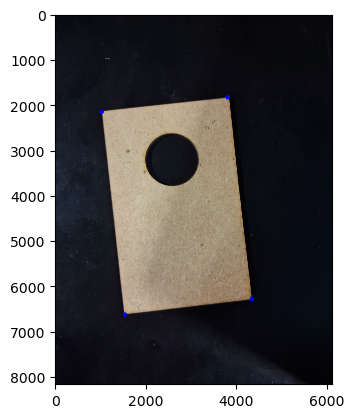

In [112]:
image_c = rgb_image.copy()
for i in points_list:
    image_c = cv2.circle(image_c, i, 50, (0,0,255), -1)
plt.imshow(image_c)

4512


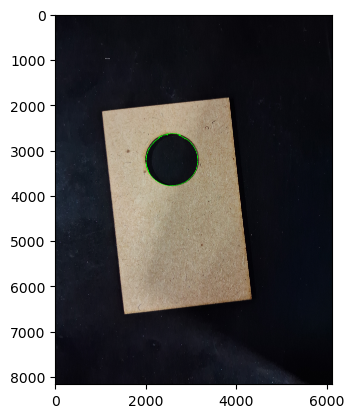

In [113]:
contours, length = contour_drawer(img,2)
circle = np.array(contours[2])
print(len(circle))

In [115]:
y = sorted(circle, key = lambda x:x[0][1])
y_min = y[0]
print(y_min)
y_max = y[-1]
print(y_max)

x = sorted(circle, key = lambda x:x[0][0])
x_min = x[0]
print(x_min)
x_max = x[-1]
print(x_max)

[[2565 2631]]
[[2580 3792]]
[[1996 3291]]
[[3145 3275]]


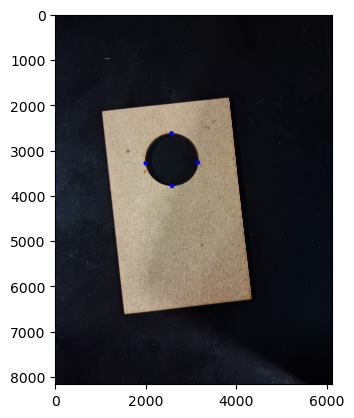

In [116]:
point_list_c = [y_min , y_max , x_min , x_max]
line1 = [y_min[0][0],y_min[0][1], y_max[0][0],y_max[0][1] ]
line2 = [x_min[0][0], x_min[0][1], x_max[0][0], x_max[0][1]]

line_1 = [y_min[0], y_max[0]]
line_2 = [x_min[0], x_max[0]]
image_c2 = rgb_image.copy()
for i in point_list_c:
    image_c2 = cv2.circle(image_c2, i[0], 50, (0,0,255), -1)
plt.imshow(image_c2)

(-645.6398197011158, 63.89622695953993)


C:\Users\Siddhartha Devan V\AppData\Local\Temp\ipykernel_12864\2423149855.py:10: RuntimeWarning: overflow encountered in scalar multiply
  intersect_x = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / determinant
C:\Users\Siddhartha Devan V\AppData\Local\Temp\ipykernel_12864\2423149855.py:11: RuntimeWarning: overflow encountered in scalar multiply
  intersect_y = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / determinant


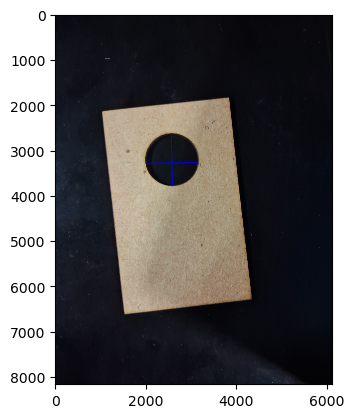

In [117]:
image_c3 = rgb_image.copy()

# Function to find the intersection point of two lines
def find_intersection(line1, line2):
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2
    determinant = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if determinant == 0:
        return None  # Lines are parallel
    intersect_x = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / determinant
    intersect_y = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / determinant
    return intersect_x, intersect_y

# Define the four points
points = [(100, 200), (300, 200), (200, 100), (200, 300)]  # Example points

# Convert the points to NumPy array
points_arr = np.array(points)

# Draw lines joining the points to form a plus sign
cv2.line(image_c3, tuple(line_1[0]), tuple(line_1[1]), (0, 0, 255), 20) 
cv2.line(image_c3, tuple(line_2[0]), tuple(line_2[1]), (0, 0, 255), 20) 

# Find the intersection point of the two lines
intersection_point = find_intersection(line1,line2)
print(intersection_point)
if intersection_point:
    # Draw a small circle at the intersection point
    cv2.circle(image_c3, (int(intersection_point[0]), int(intersection_point[1])), 25, (0, 255, 0), -1)

plt.imshow(image_c3)

In [2]:

frames = []
# Create a VideoCapture object
cap = cv2.VideoCapture(1)  # Use 0 for the default camera, change to 1 or -1 for additional cameras

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Loop to continuously read frames from the camera
while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        print("Error: Could not read frame.")
        break

    frames.append(frame)
    # Display the captured frame
    cv2.imshow('Video', frame)
    
    # Check for key press (press 'q' to exit the loop)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture object and close any open windows
cap.release()
cv2.destroyAllWindows()


In [3]:
print(len(frames))

529


In [25]:
frames_np = np.array(frames)

In [26]:
np.save('web_cam_out_of_focus.npy', frames_np)

In [23]:
rgb_image = cv2.cvtColor(frames[422], cv2.COLOR_BGR2RGB)

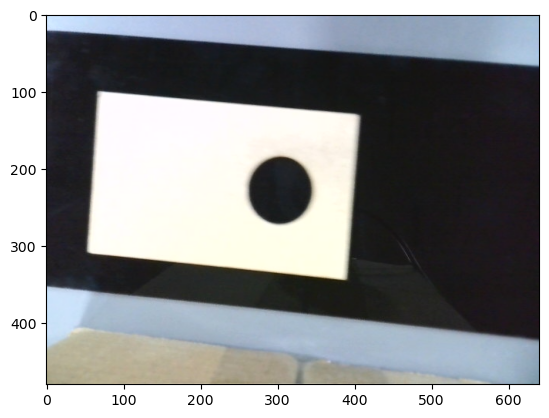

In [24]:


plt.imshow(rgb_image)

In [31]:
rgb_image = cv2.cvtColor(frames[422], cv2.COLOR_BGR2RGB)

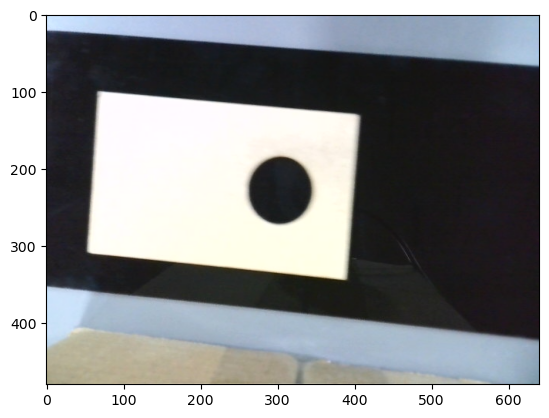

In [32]:


plt.imshow(rgb_image)